In [2]:
'''
Import necessary packages
'''
import numpy as np
import scipy
import scipy.integrate
import scipy.signal
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import matplotlib
import pickle
from tqdm import tqdm
from mpl_toolkits import mplot3d
import os
import math
import random

# from ip3_ca_ode import *
from ip3_ca_ode_cfg import *
import cfg

save = 'figures/ip3_ca_experiments/'

#set figure font sizes for readability
font = {'size' : 30,
       'family': 'serif',
       'sans-serif': ['Helvetica']}
matplotlib.rc('font', **font)
matplotlib.rc('text', usetex=True)
color_cycle = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', 
               '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']

In [2]:
cfg.input_max = 0.12
cfg.input_duration = 500
cfg.input_start = 0

In [3]:
sol = run_Gstar_controlled_experiment('pulse', t_f=300, max_step=1)

In [57]:
cfg.v_3k = 0.1

In [64]:
cfg.x_0

[0.0951442, 34.841184, 0.673079, 0.056767761]

In [65]:
cfg.v_3k

0.1

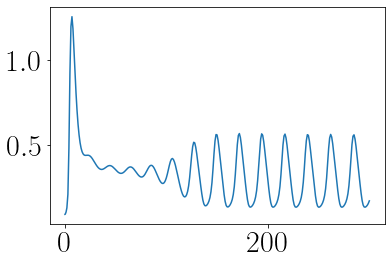

In [4]:
plt.plot(cfg.t, cfg.c)

In [89]:
def get_delay():
    c = cfg.c
    peaks = scipy.signal.find_peaks(c)[0]
    min_idx = np.argmin(c[peaks])
    max_peak = np.max(c[peaks[min_idx:]])
    #count delay being over as when peak reaches 90% max height after the initial drop
    recovery_idx = np.argmax(c[peaks[min_idx:]] > 0.9 * max_peak)
    
    num_peaks_to_recovery = recovery_idx + min_idx
    time_to_recovery = cfg.t[peaks[num_peaks_to_recovery]] - cfg.t[peaks[0]]
    
    return time_to_recovery, num_peaks_to_recovery

In [14]:
c = cfg.c
peaks = scipy.signal.find_peaks(c)[0]
min_idx = np.argmin(c[peaks])
max_peak = np.max(c[peaks[min_idx:]])
#count delay being over as when peak reaches 90% max height after the initial drop
recovery_idx = np.argmax(c[peaks[min_idx:]] > 0.9 * max_peak)

num_peaks_to_recovery = recovery_idx + min_idx
time_to_recovery = cfg.t[peaks[num_peaks_to_recovery]] - cfg.t[min_idx]

# return time_to_recovery, num_peaks_to_recovery

In [41]:
base_t, base_peaks = get_delay()

In [36]:
cfg.all_init = all_init

# C_tot

100%|████████████████████████████████████████████████████████████████████████████████| 200/200 [00:22<00:00,  8.71it/s]


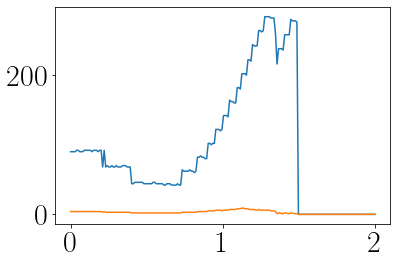

In [18]:
#modify c_t
# modifiers = np.linspace(0, 2, 200)
modifiers = np.linspace(0, 2, 200)
all_init = [0.0951442, 34.841184, 0.673079, 0.056767761, 0, 0, 0, 0]
# = [c, c_tot, h, p, Gstar, Gd1, Gd2, lambda]
ct_recovery_times = []
ct_recovery_peaks = []
for m in tqdm(modifiers):
    cfg.all_init[1] = all_init[1] * m
    sol = run_Gstar_controlled_experiment('pulse', t_f=300, max_step=2)
    time, num_peaks = get_delay()
    
    ct_recovery_times.append(time)
    ct_recovery_peaks.append(num_peaks)
    

plt.plot(modifiers, ct_recovery_times)
plt.plot(modifiers, ct_recovery_peaks)

cfg.all_init = all_init

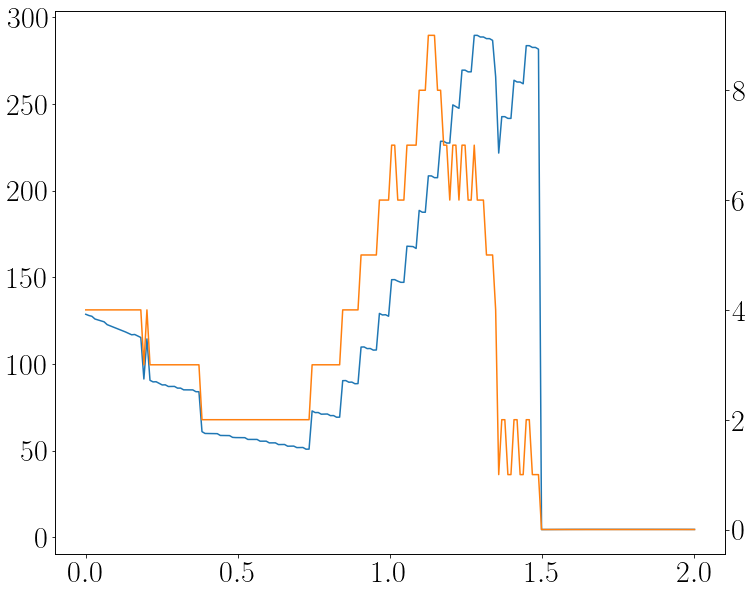

In [42]:
fig, ax = plt.subplots(figsize=(12, 10))
ax.plot(modifiers, ct_recovery_times)
ax2 = ax.twinx()
ax2.plot(modifiers, ct_recovery_peaks, c='C1')

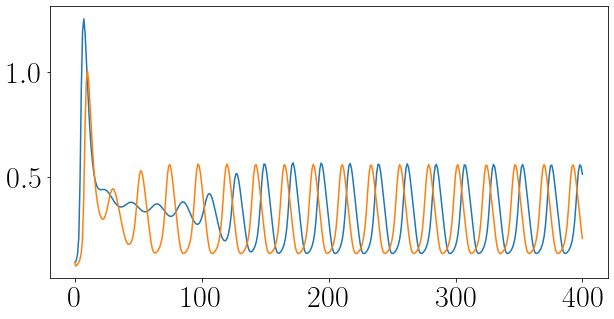

In [6]:
plt.figure(figsize=(10, 5))
cfg.all_init = all_init.copy()
# cfg.all_init[1] = cfg.all_init[1] * 0.8
sol = run_Gstar_controlled_experiment('pulse', t_f=400, max_step=1)
plt.plot(cfg.t, cfg.c, label='c_tot * 1')


cfg.all_init[1] = cfg.all_init[1] * 0.7
sol = run_Gstar_controlled_experiment('pulse', t_f=400, max_step=1)
plt.plot(cfg.t, cfg.c, label='c_tot * 0.2')

# cfg.all_init[1] = cfg.all_init[1] * 1.5
# sol = run_Gstar_controlled_experiment('pulse', t_f=400, max_step=1)
# plt.plot(cfg.t, cfg.c, label='c_tot 5 0.2')


# c

100%|████████████████████████████████████████████████████████████████████████████████| 200/200 [00:35<00:00,  5.56it/s]


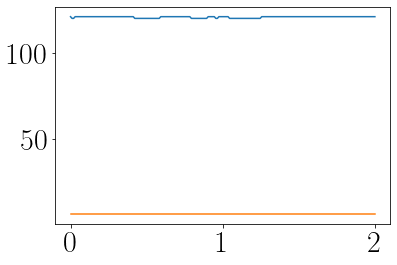

In [33]:
#modify c
modifiers = np.linspace(0, 2, 200)
all_init = [0.0951442, 34.841184, 0.673079, 0.056767761, 0, 0, 0, 0]
cfg.all_init = all_init.copy()
# = [c, c_tot, h, p, Gstar, Gd1, Gd2, lambda]
c_recovery_times = []
c_recovery_peaks = []
for m in tqdm(modifiers):
    cfg.all_init[0] = all_init[0] * m
    sol = run_Gstar_controlled_experiment('pulse', t_f=300, max_step=1)
    time, num_peaks = get_delay()
    
    c_recovery_times.append(time)
    c_recovery_peaks.append(num_peaks)
    
plt.plot(modifiers, c_recovery_times)
plt.plot(modifiers, c_recovery_peaks)

# h

100%|████████████████████████████████████████████████████████████████████████████████| 200/200 [00:27<00:00,  7.30it/s]


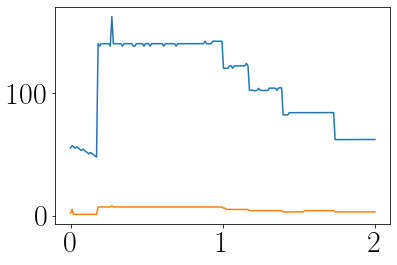

In [31]:
#modify h
modifiers = np.linspace(0, 2, 200)
all_init = [0.0951442, 34.841184, 0.673079, 0.056767761, 0, 0, 0, 0]
cfg.all_init = all_init.copy()
# = [c, c_tot, h, p, Gstar, Gd1, Gd2, lambda]
h_recovery_times = []
h_recovery_peaks = []
for m in tqdm(modifiers):
    cfg.all_init[2] = all_init[2] * m
    sol = run_Gstar_controlled_experiment('pulse', t_f=300, max_step=2)
    time, num_peaks = get_delay()
    
    h_recovery_times.append(time)
    h_recovery_peaks.append(num_peaks)
    
plt.plot(modifiers, h_recovery_times)
plt.plot(modifiers, h_recovery_peaks)

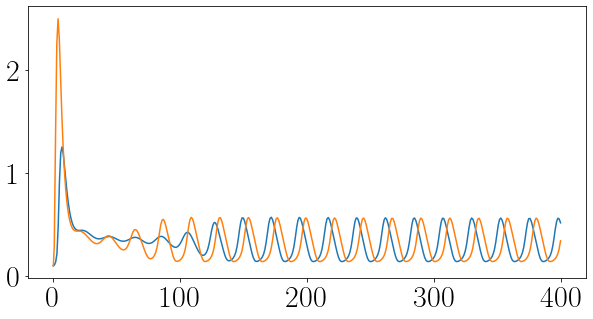

In [32]:
plt.figure(figsize=(10, 5))
cfg.all_init = all_init.copy()
# cfg.all_init[1] = cfg.all_init[1] * 0.8
sol = run_Gstar_controlled_experiment('pulse', t_f=400, max_step=1)
plt.plot(cfg.t, cfg.c, label='h * 1')


cfg.all_init[2] = cfg.all_init[2] * 1.5
sol = run_Gstar_controlled_experiment('pulse', t_f=400, max_step=1)
plt.plot(cfg.t, cfg.c, label='h * 0.7')

# cfg.all_init[1] = cfg.all_init[1] * 1.5
# sol = run_Gstar_controlled_experiment('pulse', t_f=400, max_step=1)
# plt.plot(cfg.t, cfg.c, label='c_tot 5 0.2')


# p

100%|████████████████████████████████████████████████████████████████████████████████| 200/200 [00:20<00:00,  9.85it/s]


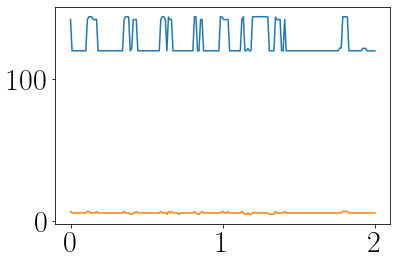

In [34]:
#modify h
modifiers = np.linspace(0, 2, 200)
all_init = [0.0951442, 34.841184, 0.673079, 0.056767761, 0, 0, 0, 0]
cfg.all_init = all_init.copy()
# = [c, c_tot, h, p, Gstar, Gd1, Gd2, lambda]
p_recovery_times = []
p_recovery_peaks = []
for m in tqdm(modifiers):
    cfg.all_init[3] = all_init[3] * m
    sol = run_Gstar_controlled_experiment('pulse', t_f=300, max_step=2)
    time, num_peaks = get_delay()
    
    p_recovery_times.append(time)
    p_recovery_peaks.append(num_peaks)
    
plt.plot(modifiers, p_recovery_times)
plt.plot(modifiers, p_recovery_peaks)

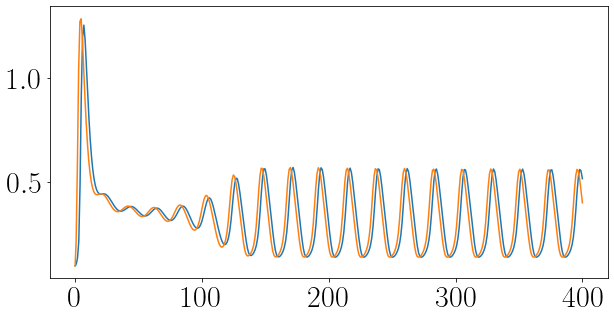

In [29]:
plt.figure(figsize=(10, 5))
cfg.all_init = all_init.copy()
# cfg.all_init[1] = cfg.all_init[1] * 0.8
sol = run_Gstar_controlled_experiment('pulse', t_f=400, max_step=1)
plt.plot(cfg.t, cfg.c, label='h * 1')


cfg.all_init[3] = cfg.all_init[3] * 2
sol = run_Gstar_controlled_experiment('pulse', t_f=400, max_step=1)
plt.plot(cfg.t, cfg.c, label='h * 0.7')

# cfg.all_init[1] = cfg.all_init[1] * 1.5
# sol = run_Gstar_controlled_experiment('pulse', t_f=400, max_step=1)
# plt.plot(cfg.t, cfg.c, label='c_tot 5 0.2')


In [36]:
delays_save_dict = {
    'ct': ct_recovery_times,
    'p': p_recovery_times,
    'c': c_recovery_times,
    'h': h_recovery_times,
    'modifiers': modifiers
}
pickle.dump(delays_save_dict, open('data/plot_data/3.4_rescue', 'wb'))

# Positive Feedback

100%|████████████████████████████████████████████████████████████████████████████████| 200/200 [00:40<00:00,  4.96it/s]


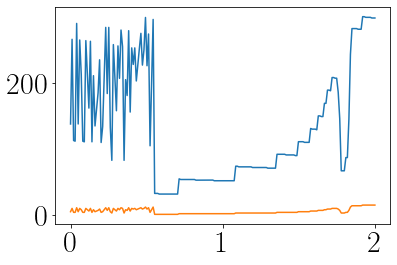

In [12]:
v_delta = cfg.v_delta

modifiers = np.linspace(0, 2, 200)
p_recovery_times = []
p_recovery_peaks = []
for m in tqdm(modifiers):
    cfg.v_delta = v_delta * m
    sol = run_Gstar_controlled_experiment('pulse', t_f=300, max_step=1)
    time, num_peaks = get_delay()
    
    p_recovery_times.append(time)
    p_recovery_peaks.append(num_peaks)
    
plt.plot(modifiers, p_recovery_times)
plt.plot(modifiers, p_recovery_peaks)

cfg.v_delta = v_delta

# Negative Feedback

100%|████████████████████████████████████████████████████████████████████████████████| 200/200 [00:41<00:00,  4.86it/s]


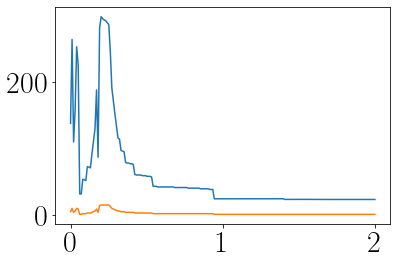

In [15]:
v_3k = cfg.v_3k

modifiers = np.linspace(0, 2, 200)
n_recovery_times = []
n_recovery_peaks = []
for m in tqdm(modifiers):
    cfg.v_delta = v_3k * m
    sol = run_Gstar_controlled_experiment('pulse', t_f=300, max_step=1)
    time, num_peaks = get_delay()
    
    n_recovery_times.append(time)
    n_recovery_peaks.append(num_peaks)
    
plt.plot(modifiers, n_recovery_times)
plt.plot(modifiers, n_recovery_peaks)

cfg.v_3k = v_3k

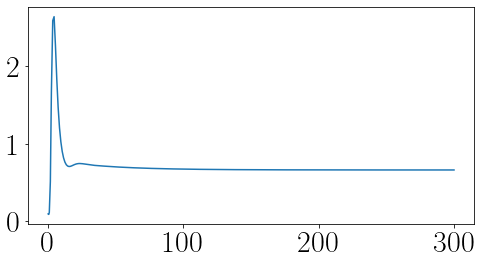

In [19]:
cfg.v_3k = v_3k * modifiers[20]

plt.figure(figsize=(8,4))
sol = run_Gstar_controlled_experiment('pulse', t_f=300, max_step=1)
plt.plot(cfg.t, cfg.c)

In [2]:
dat = load_bifurcation_data('2_param_Gstar_v3k.dat')

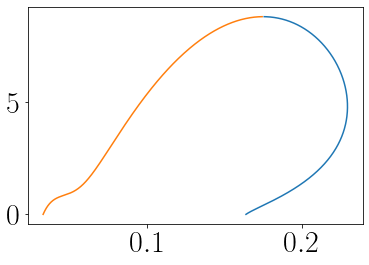

In [3]:
dat = load_bifurcation_data('2_param_Gstar_v3k.dat')

idx2 = dat[4] == 5
idx_max_2 = np.argmax(dat[idx2][1])
plt.plot(dat[idx2][0][:idx_max_2], dat[idx2][1][:idx_max_2])

idx1 = (dat[4] == 2)
idx_max_1 = np.argmax(dat[idx1][1])
plt.plot(dat[idx1][0][:idx_max_1], dat[idx1][1][:idx_max_1])

In [4]:
dat = load_bifurcation_data('2_param_Gstar_v3k.dat')

idx2 = dat[4] == 5
idx_max_2 = np.argmax(dat[idx2][1])
plt.plot(dat[idx2][0][:idx_max_2], dat[idx2][1][:idx_max_2])

idx1 = (dat[4] == 2)
idx_max_1 = np.argmax(dat[idx1][1])

v3ks = np.linspace(0, 1, 50)
Gstar_mins = []
Gstar_maxs = []
branch_min_v3k = dat[idx1][1][:idx_max_1]
branch_min_Gstar = dat[idx1][0][:idx_max_1]
branch_max_v3k = dat[idx2][1][:idx_max_2]
branch_max_Gstar = dat[idx2][0][:idx_max_2]

for v3k in v3ks[:-1]:
    min_idx = branch_min_v3k.index[np.argmax(branch_min_v3k > v3k)]
    max_idx = branch_max_v3k.index[np.argmax(branch_max_v3k > v3k)]
    Gstar_mins.append(branch_min_Gstar[min_idx])
    Gstar_maxs.append(branch_max_Gstar[max_idx])
v3ks = v3ks[:-1]

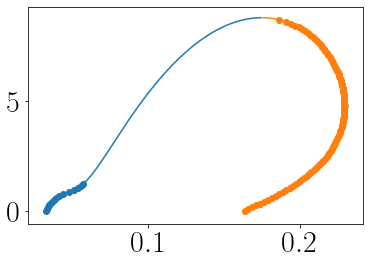

In [144]:
plt.plot(branch_min_Gstar, branch_min_v3k)
plt.plot(branch_max_Gstar, branch_max_v3k)
# plt.scatter([Gstar_mins[50] + 0.002, Gstar_maxs[50] - 0.002], [v3ks[50], v3ks[50]])
# plt.plot([Gstar_min, Gstar_max], [v3k, v3k])
plt.scatter(Gstar_mins[:15], v3ks[:15])
plt.scatter(Gstar_maxs, v3ks)

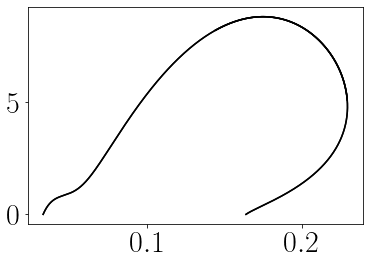

In [4]:
plot_bifurcation('2_param_Gstar_v3k.dat', increasing=False)

In [192]:
v3ks = np.linspace(0, 1, 50)
for i, v3k in enumerate(tqdm([v3ks[0]])):
    cfg.v_3k = v3k
    
    Gstar_min = Gstar_mins[i]
    Gstar_max = Gstar_maxs[i]
    
    #Take 80%, 85%, 90%, 95%, 99% interval between min and max as Gstar levels
    Gstar_range = Gstar_max - Gstar_min
    Gstar_levels = np.array([0.01, 0.05, 0.1, 0.15, 0.2, 0.8, 0.85, 0.9, 0.95, 0.99])
    Gstars = Gstar_levels * Gstar_range + Gstar_min
    
    #Set the new steady state value initial condition to start
    cfg.input_max = 0
    sol = run_Gstar_controlled_experiment('pulse', max_step=100, t_f=5000)
    cfg.all_init = [cfg.c[-1], cfg.c_tot[-1], cfg.h[-1], cfg.p[-1], 0, 0, 0, 0]
    
#     for Gstar in Gstars:
#         cfg.input_max = Gstar
#         sol = run_Gstar_controlled_experiment('pulse', max_step=0.1, t_f=1000)
#         save_experiment('delays/Gstar_' + str(Gstar) + '_v3k_' + str(v3k), False)

100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:02<00:00,  2.40s/it]


In [196]:
Gstars = np.linspace(Gstar_min, Gstar_max, 10)

In [152]:
for i in (enumerate(tqdm([1, 2, 3]))):
    pass

100%|████████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<?, ?it/s]


In [5]:
'''
Functions adjusted for Gstar control
'''

def load_experiment(name, verbose=True):
    '''
    Load an experiment to cfg for plotting and analysis
    '''
    labels = ['t', 'c', 'c_tot', 'c_er', 'h', 'p', 'Gstar', 'Gd1', 'Gd2', 'lamb', 'G', 't_input', 'glut']
    load_dict = pickle.load(open('data/experiments/' + name, 'rb'))
    for label in labels:
        setattr(cfg, label, load_dict[label])
        
        
def compute_fluxes():
    '''
    Compute the simulated fluxes from the ODEs based on the current
    data loaded in cfg
    '''
    p = cfg.p
    c = cfg.c
    c_er = cfg.c_er
    Gstar = cfg.Gstar
    h = cfg.h
    
    
    #First compute some derivative values that will be needed
    #for h and IP3R dynamics
    m_inf = p / (p + cfg.d1)
    n_inf = c / (c + cfg.d5)
    Q2 = cfg.d2 * (p + cfg.d1) / (p + cfg.d3)
    h_inf = Q2 / (Q2 + c)
    tau_h = 1 / (cfg.a2 * (Q2 + c))
    
    #Compute the fluxes through each channel
    J_ip3r = cfg.v_ip3r * (m_inf**3) * (n_inf**3) * (h**3) * (c_er - c)
    J_serca = cfg.v_serca * (c**1.75) / (c**1.75 + cfg.k_serca**1.75)
    J_pmca = cfg.v_pmca * (c**2) / (c**2 + cfg.k_pmca**2)
    J_soc = cfg.v_soc * (cfg.k_soc**4) / (cfg.k_soc**4 + c_er**4)
#     J_soc = cfg.v_soc * (cfg.k_soc**2) / (cfg.k_soc**2 + c_er**2)
    
    #leak fluxes
    J_er_leak = cfg.v_er_leak * (c_er - c) #ER <-> Cyt leak
    J_ecs_add = cfg.v_in - cfg.k_out * c #Cyt <-> extracellular leak
    
    ip3_production = cfg.v_beta*Gstar + cfg.v_delta*((cfg.k_delta)/(1 + p))*((c**2)/(c**2 + cfg.k_plcdelta**2))
    ip3_degradation = cfg.v_3k*((c**4)/(c**4 + cfg.k_d**4))*(p/(p+cfg.k_3)) + cfg.r_5p*p
    
    cfg.J_ip3r = J_ip3r
    cfg.J_serca = J_serca
    cfg.J_pmca = J_pmca
    cfg.J_soc = J_soc
    cfg.J_er_leak = J_er_leak
    cfg.J_ecs_add = J_ecs_add
    cfg.ip3_production = ip3_production
    cfg.ip3_degradation = ip3_degradation

In [182]:
files = os.listdir('data/experiments/delays')
# plot_files = [file for file in files if str(v3ks[0]) in file]
plot_files = [file for file in files if file[-3:] == '0.0']

In [183]:
plot_files

['Gstar_0.033706046_v3k_0.0',
 'Gstar_0.03896463_v3k_0.0',
 'Gstar_0.04553786_v3k_0.0',
 'Gstar_0.05211109_v3k_0.0',
 'Gstar_0.05868432_v3k_0.0',
 'Gstar_0.13756308_v3k_0.0',
 'Gstar_0.14413631_v3k_0.0',
 'Gstar_0.15070953999999998_v3k_0.0',
 'Gstar_0.15728277_v3k_0.0',
 'Gstar_0.16254135399999997_v3k_0.0']

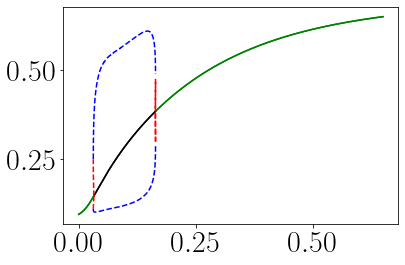

In [188]:
plot_bifurcation('c_Gstar_v3k_0_vdelta_0.01.dat')
plt.plot()

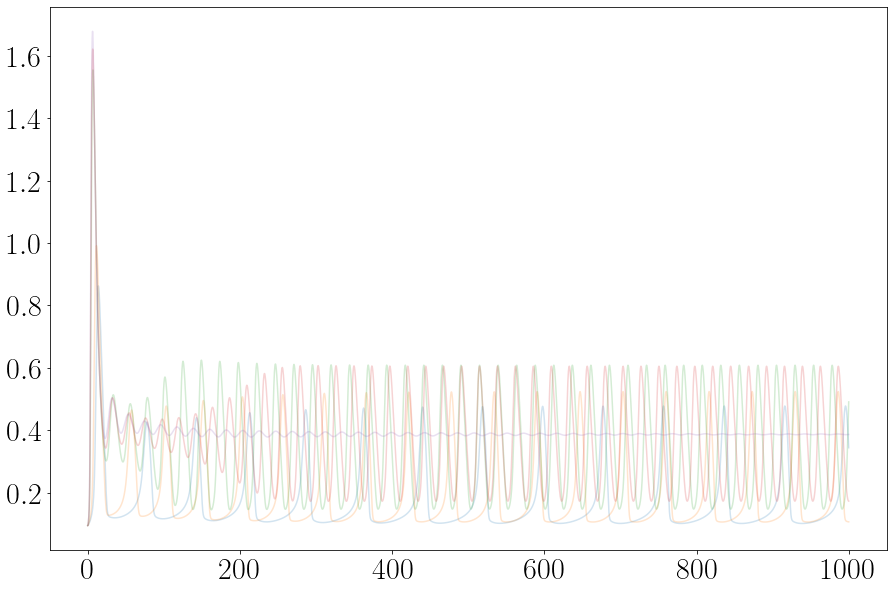

In [187]:
plt.figure(figsize=(15, 10))
counter = 1
for file in plot_files:
    if counter % 2 == 0:
        load_experiment('delays/' + file)
        plt.plot(cfg.t, cfg.c, alpha=0.2)
    counter += 1

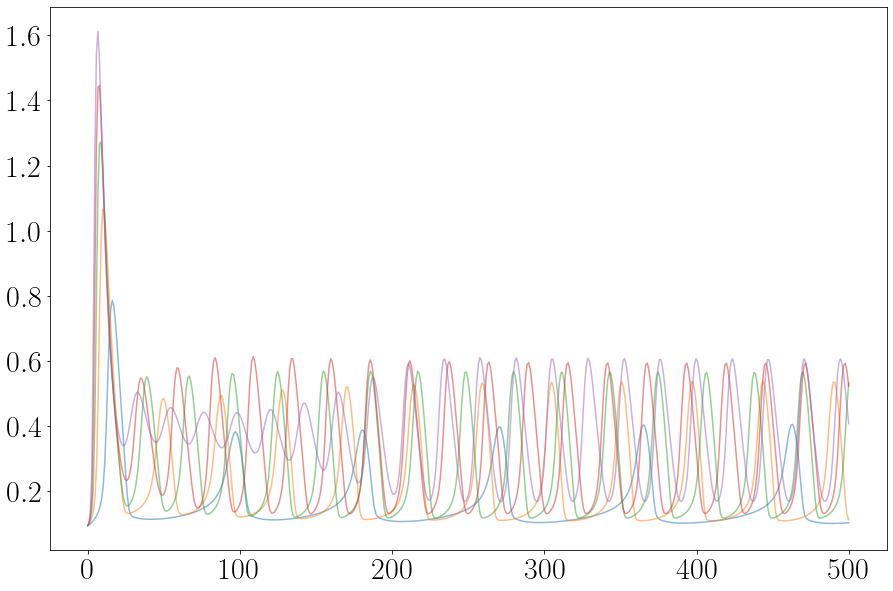

In [198]:
plt.figure(figsize=(15, 10))
counter = 0
for Gstar in Gstars:
    cfg.input_max = Gstar
    if counter % 2 == 0:
        sol = run_Gstar_controlled_experiment('pulse', t_f=500, max_step=1)
#         load_experiment('delays/' + file)
        plt.plot(cfg.t, cfg.c, alpha=0.5)
    counter += 1

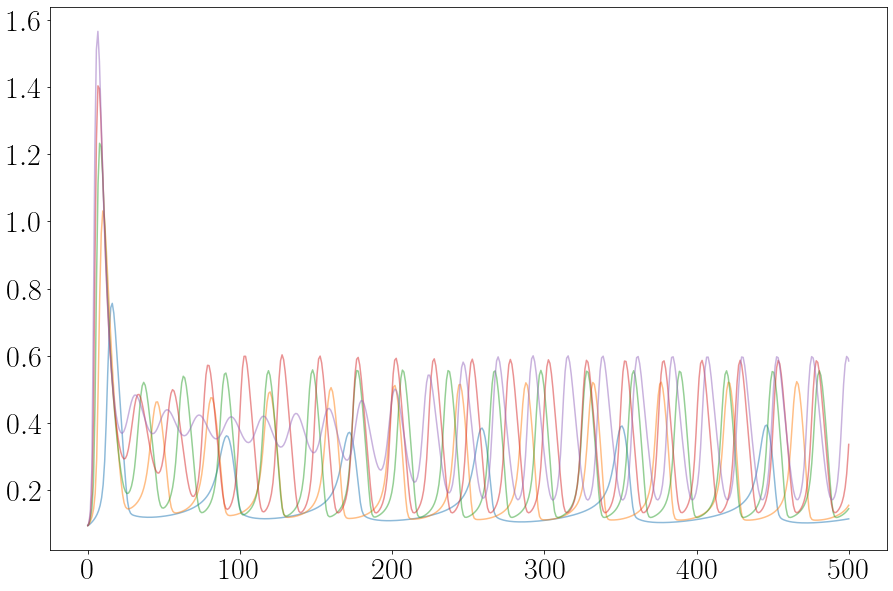

In [199]:
i = 1
v3k = v3ks[i]
cfg.v_3k = v3k
Gstar_min = Gstar_mins[i]
Gstar_max = Gstar_maxs[i]
Gstars = np.linspace(Gstar_min, Gstar_max, 10)
plt.figure(figsize=(15, 10))
counter = 0
for Gstar in Gstars:
    cfg.input_max = Gstar
    if counter % 2 == 0:
        sol = run_Gstar_controlled_experiment('pulse', t_f=500, max_step=1)
#         load_experiment('delays/' + file)
        plt.plot(cfg.t, cfg.c, alpha=0.5)
    counter += 1

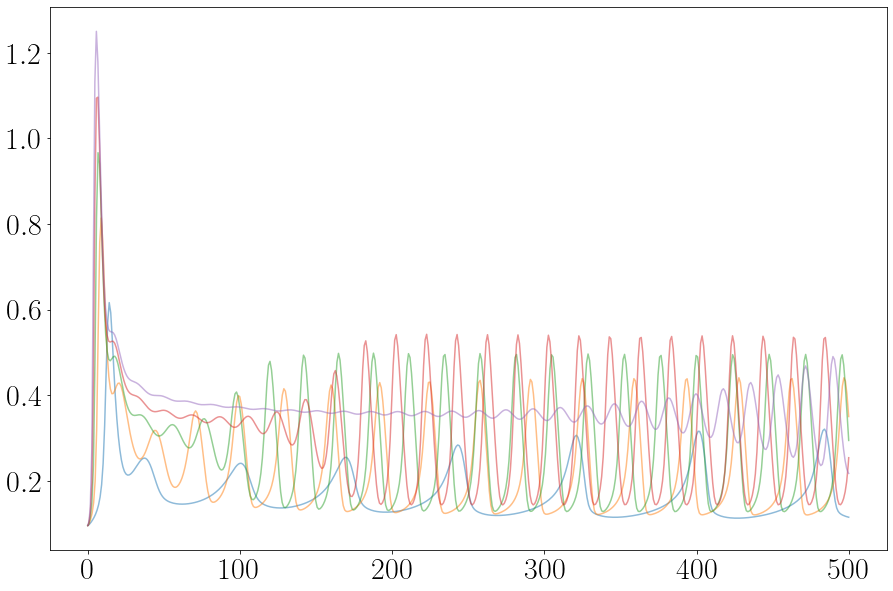

In [201]:
i = 10
v3k = v3ks[i]
cfg.v_3k = v3k
Gstar_min = Gstar_mins[i]
Gstar_max = Gstar_maxs[i]
Gstars = np.linspace(Gstar_min, Gstar_max, 10)
plt.figure(figsize=(15, 10))
counter = 0
for Gstar in Gstars:
    cfg.input_max = Gstar
    if counter % 2 == 0:
        sol = run_Gstar_controlled_experiment('pulse', t_f=500, max_step=1)
#         load_experiment('delays/' + file)
        plt.plot(cfg.t, cfg.c, alpha=0.5)
    counter += 1

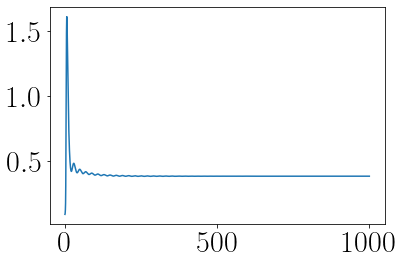

In [161]:
plt.plot(cfg.t, cfg.c)

In [147]:
save_experiment('delays/Gstar_0_v3k_0')

Experiment saved


In [140]:
sol = run_Gstar_controlled_experiment('pulse', max_step=100, t_f=5000)

C:\Users\Andy\Desktop\Work\Utah\Projects\Epilepsy Astrocytes\ip3_ca_ode_cfg.py:233: RuntimeWarning: invalid value encountered in double_scalars
  J_serca = cfg.v_serca * (c**1.75) / (c**1.75 + cfg.k_serca**1.75)


In [90]:
Gstar_min

0.120033

In [99]:
default_init = cfg.all_init.copy()

In [141]:
cfg.all_init = [cfg.c[-1], cfg.c_tot[-1], cfg.h[-1], cfg.p[-1], 0, 0, 0, 0]

In [127]:
cfg.v_3k = 0.01

In [145]:
v3ks[:15]

array([0.        , 0.08880293, 0.17760586, 0.26640879, 0.35521172,
       0.44401465, 0.53281758, 0.62162051, 0.71042343, 0.79922636,
       0.88802929, 0.97683222, 1.06563515, 1.15443808, 1.24324101])

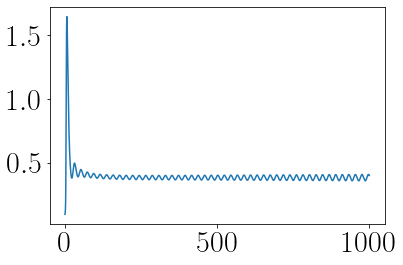

In [142]:
# cfg.input_max = Gstars[-2]
# cfg.input_max = Gstars[0]
# cfg.all_init = [0.25, 23, 0.56, 0.22, 0, 0, 0, 0]
cfg.input_max = 0.16
# cfg.v_3k = 0
sol = run_Gstar_controlled_experiment('pulse', max_step=0.1, t_f=1000)
plt.plot(cfg.t, cfg.c)

In [206]:
a = [1, 2, 3]
a[:2]

[1, 2]

C:\Users\Andy\Desktop\Work\Utah\Projects\Epilepsy Astrocytes\ip3_ca_ode_cfg.py:233: RuntimeWarning: invalid value encountered in double_scalars
  J_serca = cfg.v_serca * (c**1.75) / (c**1.75 + cfg.k_serca**1.75)
C:\Users\Andy\Desktop\Work\Utah\Projects\Epilepsy Astrocytes\ip3_ca_ode_cfg.py:233: RuntimeWarning: invalid value encountered in double_scalars
  J_serca = cfg.v_serca * (c**1.75) / (c**1.75 + cfg.k_serca**1.75)
C:\Users\Andy\Desktop\Work\Utah\Projects\Epilepsy Astrocytes\ip3_ca_ode_cfg.py:233: RuntimeWarning: invalid value encountered in double_scalars
  J_serca = cfg.v_serca * (c**1.75) / (c**1.75 + cfg.k_serca**1.75)
C:\Users\Andy\miniconda3\lib\site-packages\ipykernel_launcher.py:27: UserWarning: This figure was using constrained_layout==True, but that is incompatible with subplots_adjust and or tight_layout: setting constrained_layout==False. 


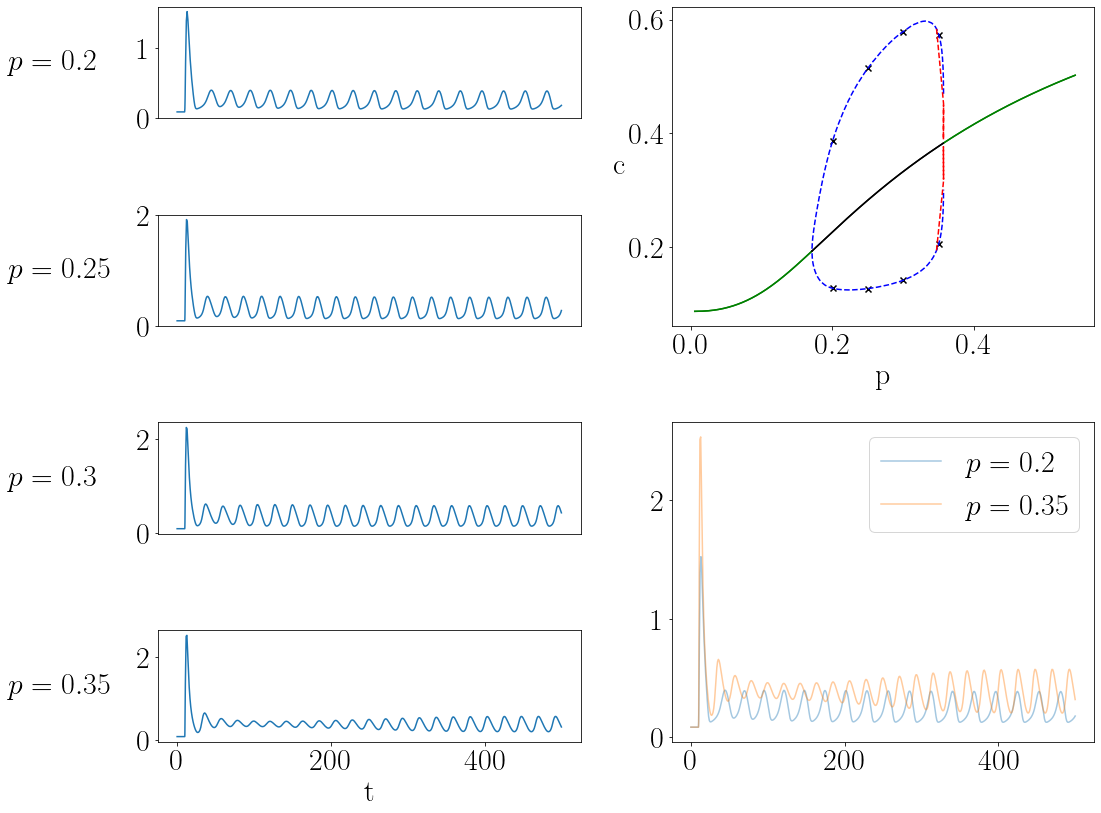

In [50]:
fig = plt.figure(constrained_layout=True, figsize=(16, 12))
gs = fig.add_gridspec(4, 4)
cfg.x_0 = [0.0865415, 36.49084, 0.6255124, 0]
combined_ax = fig.add_subplot(gs[2:, 2:])
axs = []
cfg.input_duration = 1000

for i, p in enumerate([0.2, 0.25, 0.30, 0.35]):
    ax = fig.add_subplot(gs[i, :2])
    cfg.input_max = p
    run_ip3_controlled_experiment('pulse', t_f=500, max_step=1)
    ax.plot(cfg.t, cfg.c)
    if(i == 0 or i == 3):
        combined_ax.plot(cfg.t, cfg.c, label='$p={}$'.format(p), alpha=0.4)
    if(i != 3):
        ax.set_xticks([])
    ax.set_ylabel('$p={}$'.format(p), rotation=0, ha='left', va='center', labelpad=130)
    axs.append(ax)
axs[0].set_yticks([0, 1])
axs[3].set_yticks([0, 2])
axs[3].set_xlabel('t')

ax = fig.add_subplot(gs[:2, 2:])
plot_bifurcation('ip3_ca.dat', ax)
ax.set_xlabel('p')
ax.set_ylabel('c', rotation=0, va='center', ha='right')
fig.tight_layout()
# combined_ax.legend(bbox_to_anchor=(0.7, -0.2, 0, 0))
combined_ax.legend()

#Add p points to bifurcation
data = load_bifurcation_data('ip3_ca.dat')
stable = data[data[3] == 3]
xs = []
ys = []
for p in [0.2, 0.25, 0.3, 0.35]:
    idx = np.argmax(stable[0] > p)
    row = stable.iloc[idx]
    xs.append(row[0])
    ys.append(row[1])
    xs.append(row[0])
    ys.append(row[2])
ax.scatter(xs, ys, marker='x', color='k')

cfg.x_0 = [0.0951442, 34.841184, 0.673079, 0.056767761]

In [18]:
dat = load_bifurcation_data('2_param_Gstar_v3k.dat')

idx2 = dat[4] == 5
idx_max_2 = np.argmax(dat[idx2][1])

idx1 = (dat[4] == 2)
idx_max_1 = np.argmax(dat[idx1][1])

v3ks = [0, 0.1, 0.5]
Gstar_mins = []
Gstar_maxs = []
branch_min_v3k = dat[idx1][1][:idx_max_1]
branch_min_Gstar = dat[idx1][0][:idx_max_1]
branch_max_v3k = dat[idx2][1][:idx_max_2]
branch_max_Gstar = dat[idx2][0][:idx_max_2]

for v3k in v3ks:
    min_idx = branch_min_v3k.index[np.argmax(branch_min_v3k > v3k)]
    max_idx = branch_max_v3k.index[np.argmax(branch_max_v3k > v3k)]
    Gstar_mins.append(branch_min_Gstar[min_idx])
    Gstar_maxs.append(branch_max_Gstar[max_idx])
v3ks = v3ks[:-1]

In [22]:
np.linspace(0.05,0.95,4)

array([0.05, 0.35, 0.65, 0.95])

In [24]:
i = 0.935974

In [25]:
round(i,3)

0.936

C:\Users\Andy\miniconda3\lib\site-packages\ipykernel_launcher.py:36: UserWarning: This figure was using constrained_layout==True, but that is incompatible with subplots_adjust and or tight_layout: setting constrained_layout==False. 


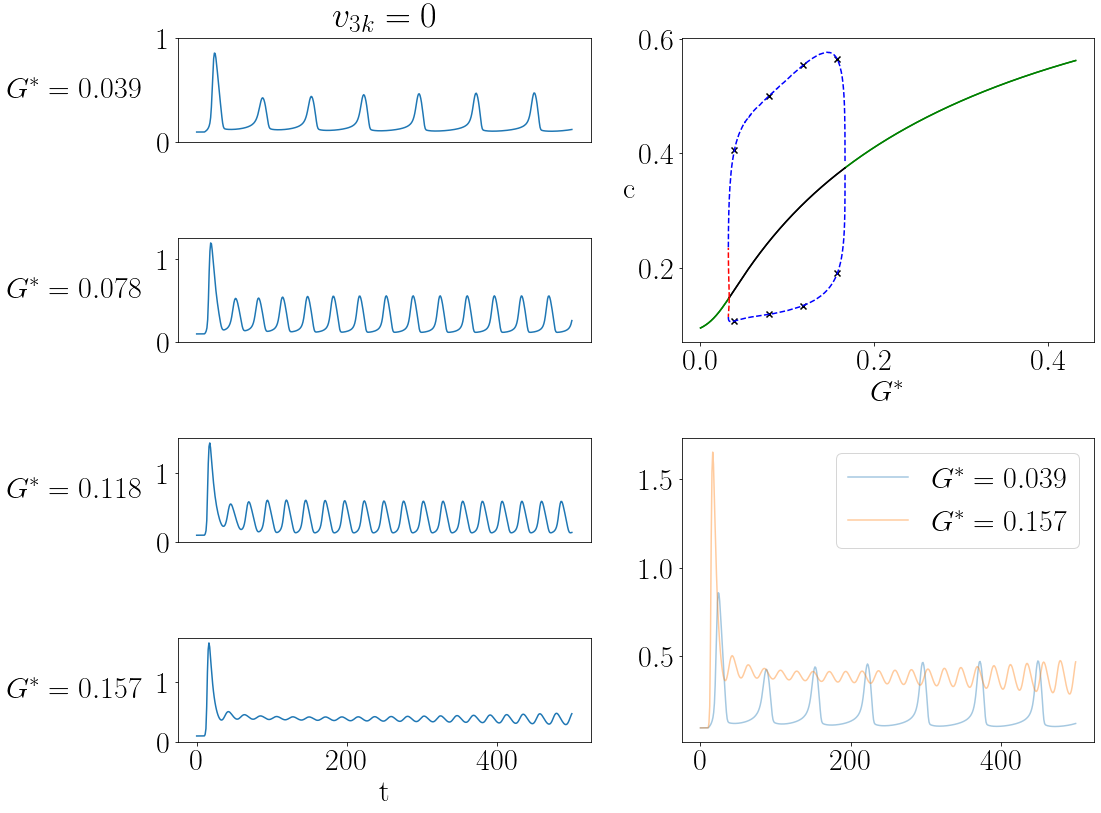

In [47]:
# fig, ax = plt.subplots(4, 1, figsize=(12, 10))
fig = plt.figure(constrained_layout=True, figsize=(16, 12))
gs = fig.add_gridspec(4, 4)
combined_ax = fig.add_subplot(gs[2:, 2:])
axs = []
cfg.input_duration = 1000

ratios = np.linspace(0.05, 0.95, 4)
Gstar_min = Gstar_mins[0]
Gstar_max = Gstar_maxs[0]
Gstar_range = Gstar_max - Gstar_min
Gstars = ratios * Gstar_range + Gstar_min
cfg.v_3k = v3ks[0]

#Run experiments and plot
for i, Gstar in enumerate(Gstars):
    ax = fig.add_subplot(gs[i, :2])
    cfg.input_max = Gstar
    run_Gstar_controlled_experiment('pulse', t_f=500, max_step=1)
    ax.plot(cfg.t, cfg.c)
    if(i == 0 or i == 3):
        combined_ax.plot(cfg.t, cfg.c, label='$G^*={}$'.format(round(Gstar, 3)), alpha=0.4)
    if(i != 3):
        ax.set_xticks([])
    ax.set_ylabel('$G^*={}$'.format(round(Gstar, 3)), rotation=0, ha='left', va='center', labelpad=150)
    axs.append(ax)
    ax.set_yticks([0,1])
axs[0].set_title('$v_{3k}=' + str(cfg.v_3k) + '$')
axs[3].set_xlabel('t')

#Add bifurcation plot
ax = fig.add_subplot(gs[:2, 2:])
plot_bifurcation('Gstar_v3k_0.1_kd_0.7.dat', ax)
ax.set_xlabel('$G^*$')
ax.set_ylabel('c', rotation=0, va='center', ha='right')
fig.tight_layout()

#Add G* points to bifurcation
data = load_bifurcation_data('Gstar_v3k_0.1_kd_0.7.dat')
stable = data[data[3] == 3]
xs = []
ys = []
for Gstar in Gstars:
    idx = np.argmax(stable[0] > Gstar)
    row = stable.iloc[idx]
    xs.append(row[0])
    ys.append(row[1])
    xs.append(row[0])
    ys.append(row[2])
ax.scatter(xs, ys, marker='x', color='k')

combined_ax.legend()

In [45]:
ys

[0.4053, 0.4053, 0.499898, 0.499898, 0.553998, 0.553998, 0.564496, 0.564496]

In [32]:
dat = load_bifurcation_data('Gstar_v3k_0.1_kd_0.7.dat')

In [33]:
stable = dat[dat[3] == 3]

In [41]:
np.argmax(stable[0] > 0.039)

135

In [42]:
stable.iloc[135]

0    0.039036
1    0.405756
2    0.107119
3    3.000000
4    2.000000
5    0.000000
Name: 857, dtype: float64

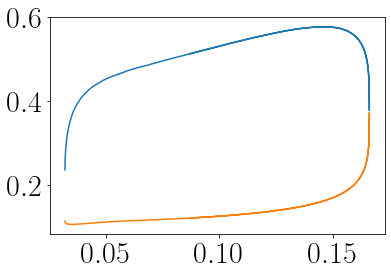

In [36]:
plt.plot(stable[0], stable[1])
plt.plot(stable[0], stable[2])

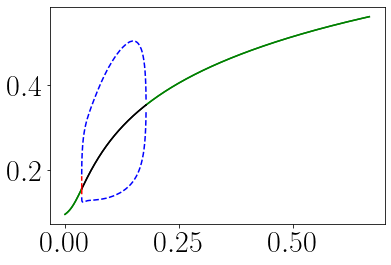

In [12]:
plot_bifurcation('Gstar_v3k_0.5_kd_0.7.dat')

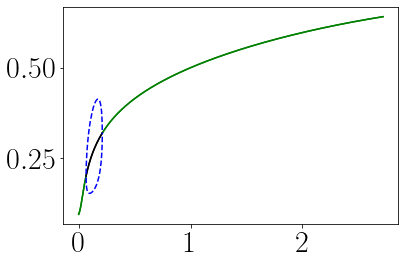

In [13]:
plot_bifurcation('Gstar_v3k_2_kd_0.7.dat')

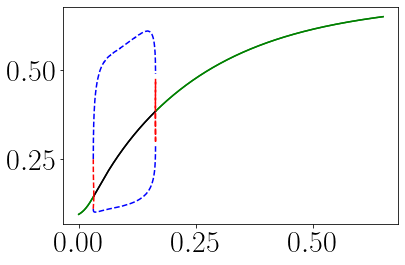

In [14]:
plot_bifurcation('Gstar_no_neg.dat')

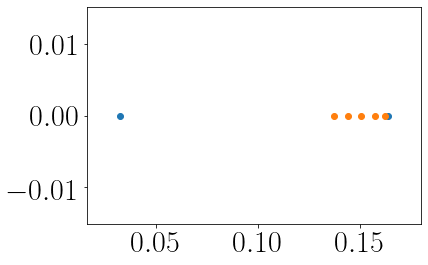

In [14]:
plt.scatter([Gstar_min, Gstar_max], [0, 0])
plt.scatter([Gstars], np.full(len(Gstars), 0))

In [3]:
dat = load_bifurcation_data('2_param_Gstar_v3k.dat')

# Pre pulse noise

Here we will assume that the system starts by receiving Poisson train spike inputs for a duration of 5 minutes and see what distribution of "initial conditions" we end with after the 5 minutes for different input frequencies/shapes/strengths

In [1]:
def next_time(rate):
    return -math.log(1 - random.random()) / rate

def generate_train(rate, t_f=300):
    total_time = 0
    spikes = []
    while True:
        nxt = next_time(rate)
        total_time += nxt
        if total_time > t_f:
            return np.array(spikes)
        spikes.append(total_time)
    
    
def exponential_input(t):
    '''
    This function will generate an exponential increase and decay glutamate input
    '''
    input_half = cfg.input_duration / 2
    if(t > cfg.input_start and t <= (cfg.input_start + input_half)):
        return cfg.input_max * (1 - np.exp((t - cfg.input_start) / (t - cfg.input_start - input_half)))
    elif(t > (cfg.input_start + input_half) and t <= (cfg.input_start + cfg.input_duration)):
        return cfg.input_max * np.exp((t - cfg.input_start - input_half) / (t - cfg.input_start - cfg.input_duration))
    else:
        return cfg.input_min
    
    
def exponential_train(t):
    '''
    Get exponential input based on a Poisson spike train
    '''
    if t > np.max(cfg.train):
        idx = len(cfg.train) - 1
    else:
        idx = np.argmax(cfg.train > t) - 1
        if idx < 0:
            return cfg.input_min
#     print(idx)
    t = t - cfg.train[idx]
    return exponential_input(t)
    

In [55]:
cfg.input_smoothing = 0

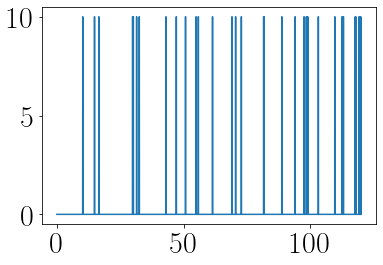

In [56]:
x = np.arange(0, 120, 0.005)
cfg.input_max = 10
cfg.input_duration = 0.06
plt.plot(x, [exponential_train(t) for t in x])

In [50]:
cfg.input_start

-1

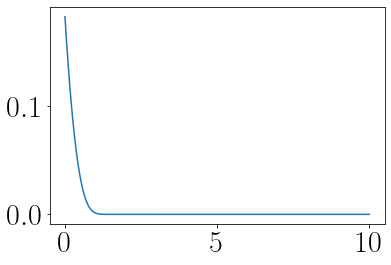

In [53]:
ts = np.linspace(0, 10, 200)
cfg.input_start = 0
cfg.input_duration = -8
plt.plot(ts, [exponential_input(t) for t in ts])

In [34]:
cfg.input_start = -1

In [5]:
cfg.input_duration = 0.06
cfg.input_max = 0.3
cfg.train = generate_train(0.1, t_f=1000)

In [16]:
for r in [0.2, 0.5, 1.0]:
    for A in [10, 20, 50]:
        if((r == 0.2 and A == 10) or (r == 0.5 and A == 10)):
            continue
        print('rate_' + str(r) + '_conc_' + str(A))
        cfg.train = generate_train(r, t_f=1000)
        cfg.input_max = A
        sol = run_experiment('train', max_step=0.005, t_f=1000)
        save_experiment('poisson/rate_' + str(r) + '_conc_' + str(A))

rate_0.2_conc_20


KeyboardInterrupt: 

Experiment saved


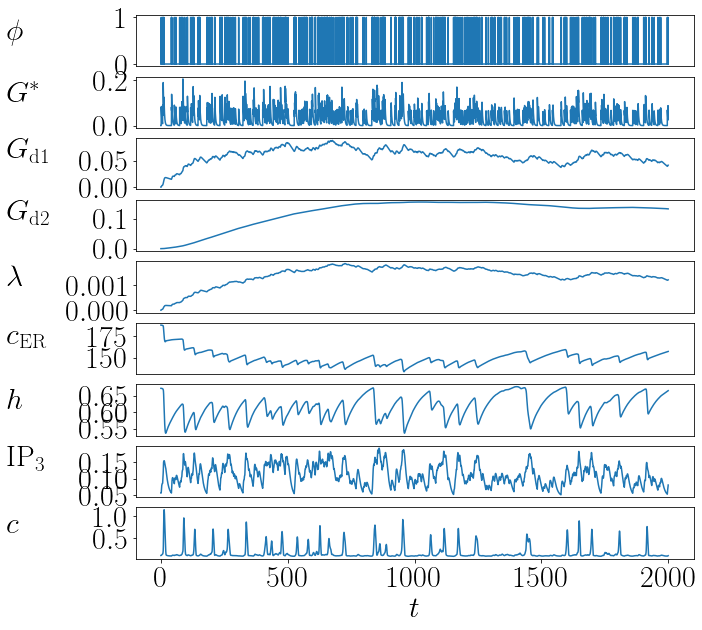

In [72]:
cfg.input_duration = 0.1
cfg.input_smoothing = 0
cfg.input_start = 0
cfg.kd2 = 0.6
cfg.v_delta = 0.01
r = 0.2
A = 1
cfg.train = generate_train(r, t_f=20000)
cfg.input_max = A
sol = run_experiment('train', max_step=0.05, t_f=2000)
save_experiment('rate_' + str(r) + '_conc_' + str(A) + '_2')
plot_experiment_plots(['glut', 'Gstar', 'Gd1', 'Gd2', 'lamb', 'c_er', 'h', 'p', 'c'])

In [ ]:
load_experiment('rate_0.2_conc_10

In [74]:
cfg.c[-1]

0.08975953260563643

In [73]:
load_exp

0.08975953260563643

In [69]:
cfg.v_delta

0.05

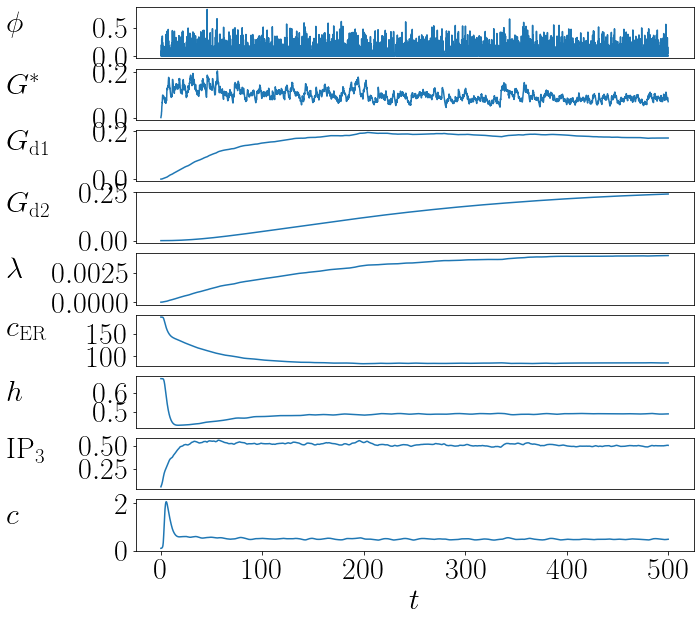

In [68]:
cfg.input_max = 0
run_experiment('pulse', noise=0.2, t_f=500)
plot_experiment_plots(['glut', 'Gstar', 'Gd1', 'Gd2', 'lamb', 'c_er', 'h', 'p', 'c'])

In [58]:
save_experiment('rate_' + str(r) + '_conc_' + str(A))

Experiment saved


In [ ]:
plot_experiment_plots(['glut', 'c'])

In [17]:
sol = run_Gstar_controlled_experiment('train', max_step=0.005, t_f=1000)

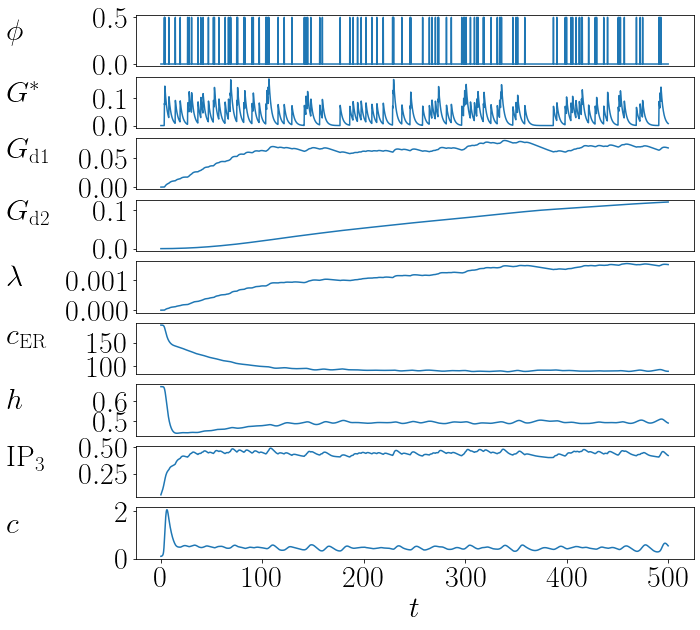

In [64]:
plot_experiment_plots(['glut', 'Gstar', 'Gd1', 'Gd2', 'lamb', 'c_er', 'h', 'p', 'c'])

In [86]:
save_experiment('poisson/Gstar_rate_0.1_conc_0.3')

Experiment saved


ValueError: x and y must have same first dimension, but have shapes (10000,) and (200000,)

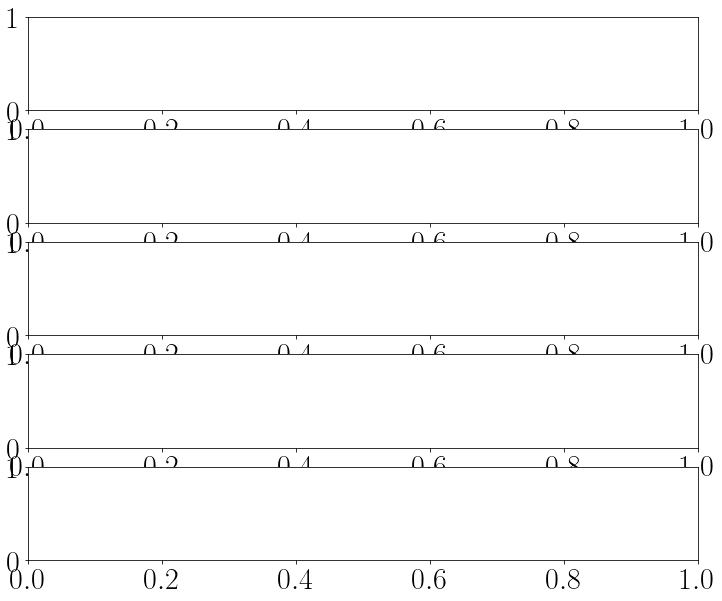

In [78]:
fig, ax = plt.subplots(5, 1, figsize=(12, 10))
plot_experiment_plots(['glut', 'Gstar', 'p', 'c_tot', 'c'], ax)

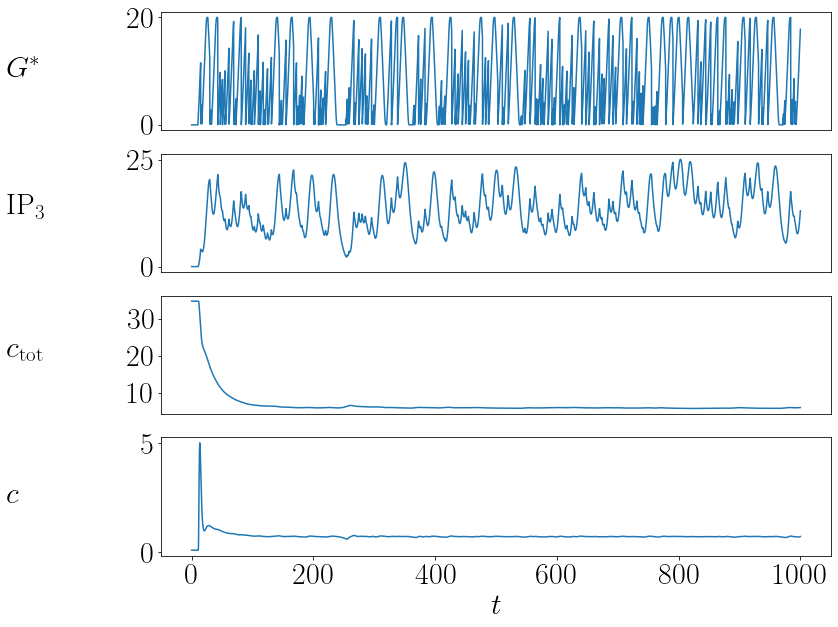

In [18]:
fig, ax = plt.subplots(4, 1, figsize=(12, 10))
plot_experiment_plots(['Gstar', 'p', 'c_tot', 'c'], ax)

In [ ]:
for i, r in enumerate([0.2, 0.5, 1.0]):
    for A in [10, 20, 50]:

Experiment loaded


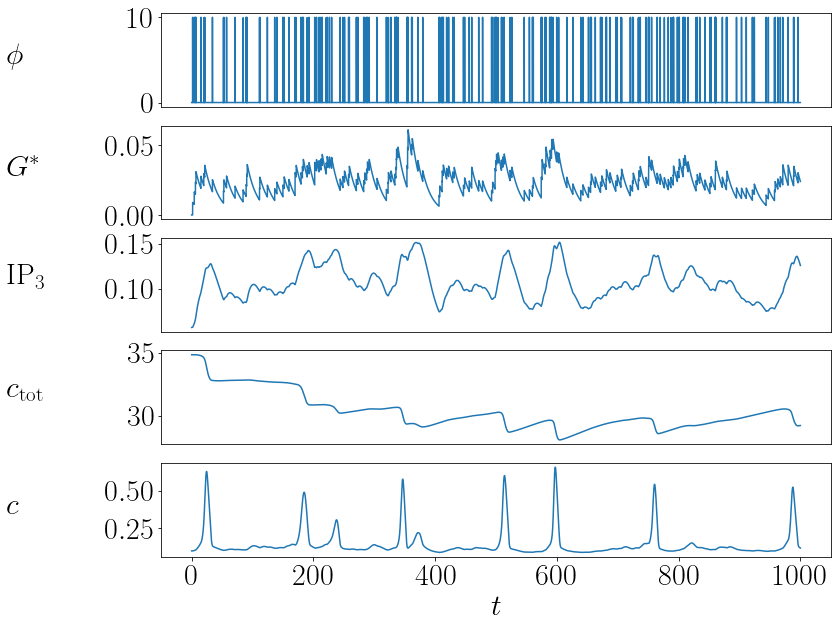

In [56]:
load_experiment('poisson/rate_0.2_conc_10_2')
fig, ax = plt.subplots(5, 1, figsize=(12, 10))
plot_experiment_plots(['glut', 'Gstar', 'p', 'c_tot', 'c'], ax)
plt.savefig('')

In [57]:
load_experiment('poisson/rate_0.2_conc_10_2')

Experiment loaded


In [62]:
#collect random initial conditions
cs = []
ps = []
c_ts = []
hs = []
Gstars = []
Gd1s = []
Gd2s = []
lambs = []

In [65]:
ts = np.linspace(400, 999, 30)

In [66]:
for t in ts:
    idx = np.argmax(cfg.t > t)
    cs.append(cfg.c[idx])
    ps.append(cfg.p[idx])
    c_ts.append(cfg.c_tot[idx])
    hs.append(cfg.h[idx])
    Gstars.append(cfg.Gstar[idx])
    Gd1s.append(cfg.Gd1[idx])
    Gd2s.append(cfg.Gd2[idx])
    lambs.append(cfg.lamb[idx])

In [71]:
cfg.all_init = [cfg.c[-1], cfg.c_tot[-1], cfg.h[-1], cfg.p[-1], cfg.Gstar[-1], cfg.Gd1[-1], cfg.Gd2[-1], cfg.lamb[-1]]

29.484712082867368

In [91]:
get_delay()

(980.4999999991765, 75)

# Testing correlation between delay and min oscillation value

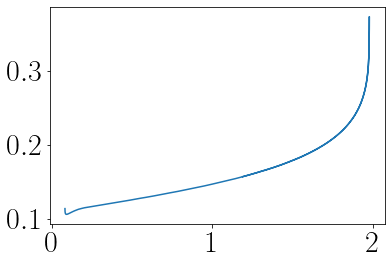

In [96]:
plt.plot(d[0], d[2])

In [105]:
cfg.input_duration = 5000
data = load_bifurcation_data('c_lambda.dat')
d = data[data[3] == 3]
glut_min = np.min(d[0])
glut_max = np.max(d[0])
ratios = np.arange(0.01, 0.99, 0.01)
glut_range = glut_max - glut_min
gluts = glut_min + glut_range * ratios

osc_mins = []
plot_gluts = []
delays = []
for glut in tqdm(gluts):
    idx = np.argmax(d[0] > glut)
    glut = d[0].iloc[idx]
    min_osc = d[2].iloc[idx]
    
    plot_gluts.append(glut)
    osc_mins.append(min_osc)
    
    cfg.input_max = glut
    run_experiment('pulse', t_f=5000, max_step=3)
    
    delays.append(get_delay()[0])

  0%|                                                                                           | 0/98 [00:00<?, ?it/s]C:\Users\Andy\Desktop\Work\Utah\Projects\Epilepsy Astrocytes\ip3_ca_ode_cfg.py:233: RuntimeWarning: invalid value encountered in double_scalars
  J_serca = cfg.v_serca * (c**1.75) / (c**1.75 + cfg.k_serca**1.75)
100%|██████████████████████████████████████████████████████████████████████████████████| 98/98 [01:09<00:00,  1.40it/s]


In [143]:
save_dict = {
    'plot_gluts': plot_gluts,
    'osc_mins': osc_mins,
    'delays': delays,
    'description': 'Comparison of the minimum c value reached during oscillation, according to bifurcation, versus the delays, with v3k=0'
}
pickle.dump(save_dict, open('data/computed_delays/full_model_ctot_0.7_bifurc_delays', 'wb'))

In [ ]:
cfg.input_duration = 5000
data = load_bifurcation_data('c_lambda.dat')
d = data[data[3] == 3]
glut_min = np.min(d[0])
glut_max = np.max(d[0])
ratios = np.arange(0.01, 0.99, 0.01)
glut_range = glut_max - glut_min
gluts = glut_min + glut_range * ratios

osc_mins = []
plot_gluts = []
delays = []
for glut in tqdm(gluts):
    idx = np.argmax(d[0] > glut)
    glut = d[0].iloc[idx]
    min_osc = d[2].iloc[idx]
    
    plot_gluts.append(glut)
    osc_mins.append(min_osc)
    
    cfg.input_max = glut
    run_experiment('pulse', t_f=5000, max_step=3)
    
    delays.append(get_delay()[0])

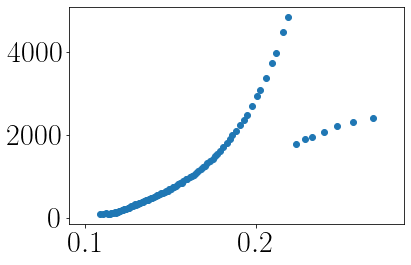

In [107]:
plt.scatter(osc_mins[1:], delays[1:])

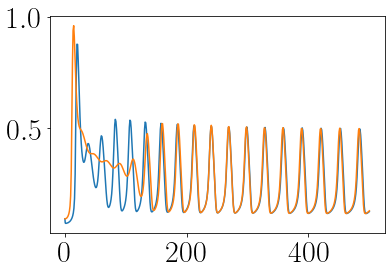

In [124]:
cfg.input_max = 0.3
c_tot_default = cfg.all_init[1]
cfg.all_init[1] = c_tot_default * 0.7
sol = run_experiment('pulse', t_f=500, max_step=1)
plt.plot(cfg.t, cfg.c)
cfg.all_init[1] = c_tot_default
sol = run_experiment('pulse', t_f=500, max_step=1)
plt.plot(cfg.t, cfg.c)

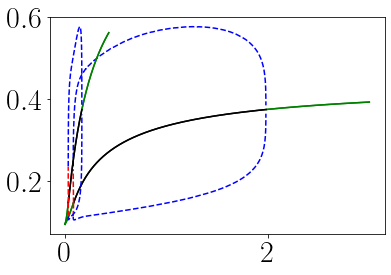

In [128]:
plot_bifurcation('c_lambda.dat')
plot_bifurcation('Gstar_v3k_0.1_kd_0.7.dat')

In [129]:
cfg.input_duration = 5000
data = load_bifurcation_data('Gstar_v3k_0.1_kd_0.7.dat')
d = data[data[3] == 3]
glut_min = np.min(d[0])
glut_max = np.max(d[0])
ratios = np.arange(0.01, 0.99, 0.01)
glut_range = glut_max - glut_min
gluts = glut_min + glut_range * ratios

osc_mins = []
plot_gluts = []
delays = []
for glut in tqdm(gluts):
    idx = np.argmax(d[0] > glut)
    glut = d[0].iloc[idx]
    min_osc = d[2].iloc[idx]
    
    plot_gluts.append(glut)
    osc_mins.append(min_osc)
    
    cfg.input_max = glut
    run_Gstar_controlled_experiment('pulse', t_f=1000, max_step=3)
    
    delays.append(get_delay()[0])

  0%|                                                                                           | 0/98 [00:00<?, ?it/s]C:\Users\Andy\Desktop\Work\Utah\Projects\Epilepsy Astrocytes\ip3_ca_ode_cfg.py:233: RuntimeWarning: invalid value encountered in double_scalars
  J_serca = cfg.v_serca * (c**1.75) / (c**1.75 + cfg.k_serca**1.75)
100%|██████████████████████████████████████████████████████████████████████████████████| 98/98 [00:17<00:00,  5.67it/s]


In [142]:
cfg.input_duration = 5000
c_tot_default = cfg.all_init[1]
data = load_bifurcation_data('c_lambda.dat')
cfg.v_3k = 0.1
cfg.all_init[1] = c_tot_default * 0.7
d = data[data[3] == 3]
glut_min = np.min(d[0])
glut_max = np.max(d[0])
ratios = np.arange(0.01, 0.99, 0.01)
glut_range = glut_max - glut_min
gluts = glut_min + glut_range * ratios

osc_mins = []
plot_gluts = []
delays = []
for glut in tqdm(gluts):
    idx = np.argmax(d[0] > glut)
    glut = d[0].iloc[idx]
    min_osc = d[2].iloc[idx]
    
    plot_gluts.append(glut)
    osc_mins.append(min_osc)
    
    cfg.input_max = glut
    run_experiment('pulse', t_f=5000, max_step=3)
    
    delays.append(get_delay()[0])
cfg.all_init[1] = c_tot_default

100%|██████████████████████████████████████████████████████████████████████████████████| 98/98 [02:07<00:00,  1.30s/it]


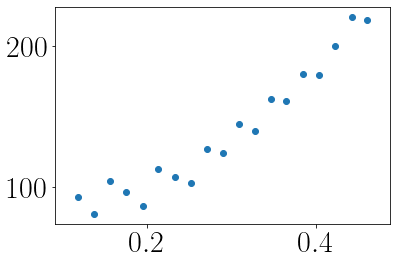

In [121]:
plt.scatter(plot_gluts[1:20], delays[1:20])

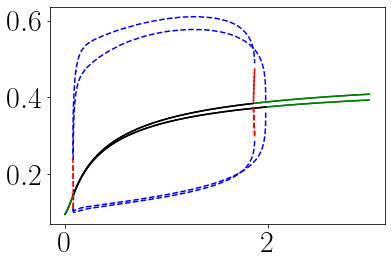

In [138]:
plot_bifurcation('c_lambda.dat')
plot_bifurcation('c_lambda_v3k_0.dat')

In [130]:
save_dict = {
    'plot_Gstars': plot_gluts,
    'osc_mins': osc_mins,
    'delays': delays,
    'description': 'Comparison of the minimum c value reached during oscillation, according to bifurcation, versus the delays for Gstar controlled'
}
pickle.dump(save_dict, open('data/computed_delays/Gstar_bifurc_delays', 'wb'))

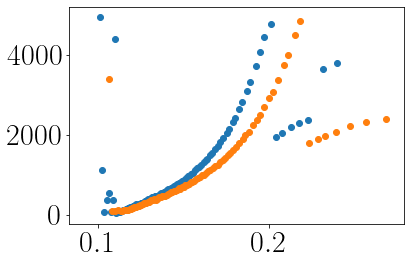

In [139]:
dct = pickle.load(open('data/computed_delays/full_model_v3k_0_bifurc_delays', 'rb'))
plt.scatter(dct['osc_mins'], dct['delays'])

dct = pickle.load(open('data/computed_delays/full_model_bifurc_delays', 'rb'))
plt.scatter(dct['osc_mins'], dct['delays'])


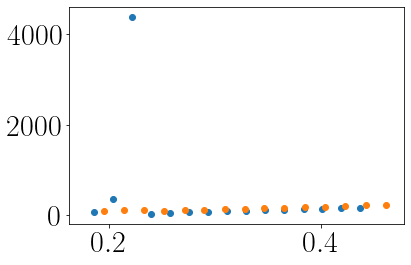

In [146]:
dct = pickle.load(open('data/computed_delays/full_model_v3k_0_bifurc_delays', 'rb'))
plt.scatter(dct['plot_gluts'][5:20], dct['delays'][5:20])

dct = pickle.load(open('data/computed_delays/full_model_bifurc_delays', 'rb'))
plt.scatter(dct['plot_gluts'][5:20], dct['delays'][5:20])


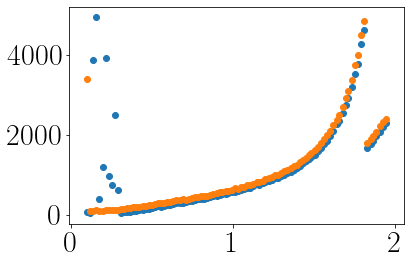

In [144]:
dct = pickle.load(open('data/computed_delays/full_model_ctot_0.7_bifurc_delays', 'rb'))
plt.scatter(dct['plot_gluts'], dct['delays'])

dct = pickle.load(open('data/computed_delays/full_model_bifurc_delays', 'rb'))
plt.scatter(dct['plot_gluts'], dct['delays'])


# Equation Params

Finally going to try to adjust some of the more obscure parameters

In [ ]:
#modify c_t
# modifiers = np.linspace(0, 2, 200)
modifiers = np.linspace(0, 2, 200)
# all_init = [0.0951442, 34.841184, 0.673079, 0.056767761, 0, 0, 0, 0]
# = [c, c_tot, h, p, Gstar, Gd1, Gd2, lambda]

params = ['d1', 'd2', 'd3', 'd5', 'a2']
ct_recovery_times = []
ct_recovery_peaks = []
for m in tqdm(modifiers):
    sol = run_Gstar_controlled_experiment('pulse', t_f=300, max_step=2)
    time, num_peaks = get_delay()
    
    ct_recovery_times.append(time)
    ct_recovery_peaks.append(num_peaks)
    

plt.plot(modifiers, ct_recovery_times)
plt.plot(modifiers, ct_recovery_peaks)

cfg.all_init = all_init